In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## warnings
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
path1 = '/home/gato/Scripts/DS/DataIntoInsights/data/Data_week_3/eda_outliers_dataset1.csv'
path2 = '/home/gato/Scripts/DS/DataIntoInsights/data/Data_week_3/eda_outliers_dataset2.csv'
path3 = '/home/gato/Scripts/DS/DataIntoInsights/data/Data_week_3/eda_outliers_dataset3.csv'

In [3]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [4]:
df1.head(10)

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229
5,2015,37894191
6,2014,34919173
7,2013,27600898
8,2012,28807552
9,2011,31392058


In [5]:
## Reading large numbers, 
## Sometimes reading large numbers can be misleading
## if we miss one num for exemple, here a function
## to help with that.

def readable_numbers(x):
    ## the doc string to explain others.
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

# Use the readable_numbers() function to create a new column 
df1['number_of_strikes_readable']=df1['number_of_strikes'].apply(readable_numbers)

In [6]:
df1.head()

,year,number_of_strikes,number_of_strikes_readable
0,2020,15620068,15.6M
1,2019,209166,209K
2,2018,44600989,44.6M
3,2017,35095195,35.1M
4,2016,41582229,41.6M


In [7]:
## mean and median

print('Mean:     {}'.format(readable_numbers(np.mean(df1['number_of_strikes']))))
print('Meadian:  {}'.format(readable_numbers(np.median(df1['number_of_strikes']))))

Mean:     26.8M
Meadian:  28.3M


## Note:
With the mean being two million strikes less than the median, we suspect the data distribution is likely skewed to the left. The left side of the distribution will be a good place to investigate. One effective way to visualize outliers is a boxplot

a boxplot divides the distribution of data points into four main quadrants or quartiles. The boxplot is helpful in visualizing and confirming the outliers

A boxplot can help to visually break down the data into percentiles / quartiles, which are important summary statistics. The shaded center of the box represents the middle 50th percentile of the data points. This is the interquartile range, or IQR. 

The boxplot "whiskers" extend 1.5x the IQR by default.

/tmp/ipykernel_7514/2930673278.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


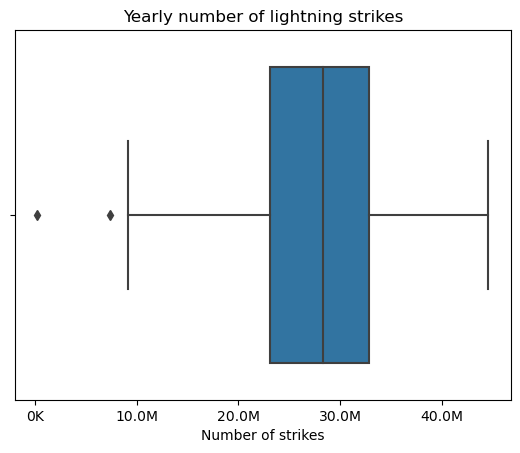

In [8]:
# Create boxplot
box = sns.boxplot(x=df1['number_of_strikes'])
g = plt.gca()

box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Number of strikes')
plt.title('Yearly number of lightning strikes');

The points to the left of the left whisker are outliers. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.

One important point for every data professional: do not assume an outlier is erroneous unless there is an explanation or reason to do so.

Let's define our IQR, upper, and lower limit.

In [9]:
# Calculate 25th percentile of annual strikes
percentile25 = df1['number_of_strikes'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df1['number_of_strikes'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(f'Lower limit is: {readable_numbers(lower_limit)}')

Lower limit is: 8.6M


Now we can use a Boolean mask to select only the rows of the dataframe where the number of strikes is less than the lower limit we calculated above. These rows are the outliers on the low end.

In [10]:
# Isolate outliers on low end
df1[df1['number_of_strikes'] < lower_limit]

,year,number_of_strikes,number_of_strikes_readable
1,2019,209166,209K
33,1987,7378836,7.4M


A **scatter plot** represents relationships between different variables with individual data points without a connecting line. 

First add labels to each point on the plot. 

We'll define them using the `addlabels()` function for x and y points. 
The plt.text function allows us to define how we want the text of each data point to appear. 
In this case, we tell the texts to start 0.5 pixels to the left of the data point and just start 0.5 pixels above the datapoint. We also defined the number of values using our readable number statement `readable_numbers()`. 

Next, let's add color to the data points. 

Let's make the outlier points red and the other points blue. 
To do that, we'll define colors by the lower limit. 
For those that fall below our previously defined lower limit, we'll code that they should be r for red, and everything else will code as b for blue. 

Our next line of code should feel familiar. 

We start by configuring our visualization size. In this case, we code 16 and eight inches, which are the default units for this function. 

Next is our code for scatter plots, ax.scatter. The ax refers to axis, which tells the notebook to plot the data on an x versus y data graphic. 

Inside the argument field, we first input the x-axis and then the y-axis, which is year and number of strikes, respectively. 

For the rest of the parameters, we fill in the x and y label and the title. We finish the parameters of our scatter plot by defining the x axis tick labels and setting the rotation of the x-axis ticks to a rotation of 45 degrees. 

The resulting plot shows us the years 1987 and 2019 are the two values in red or two outliers. 

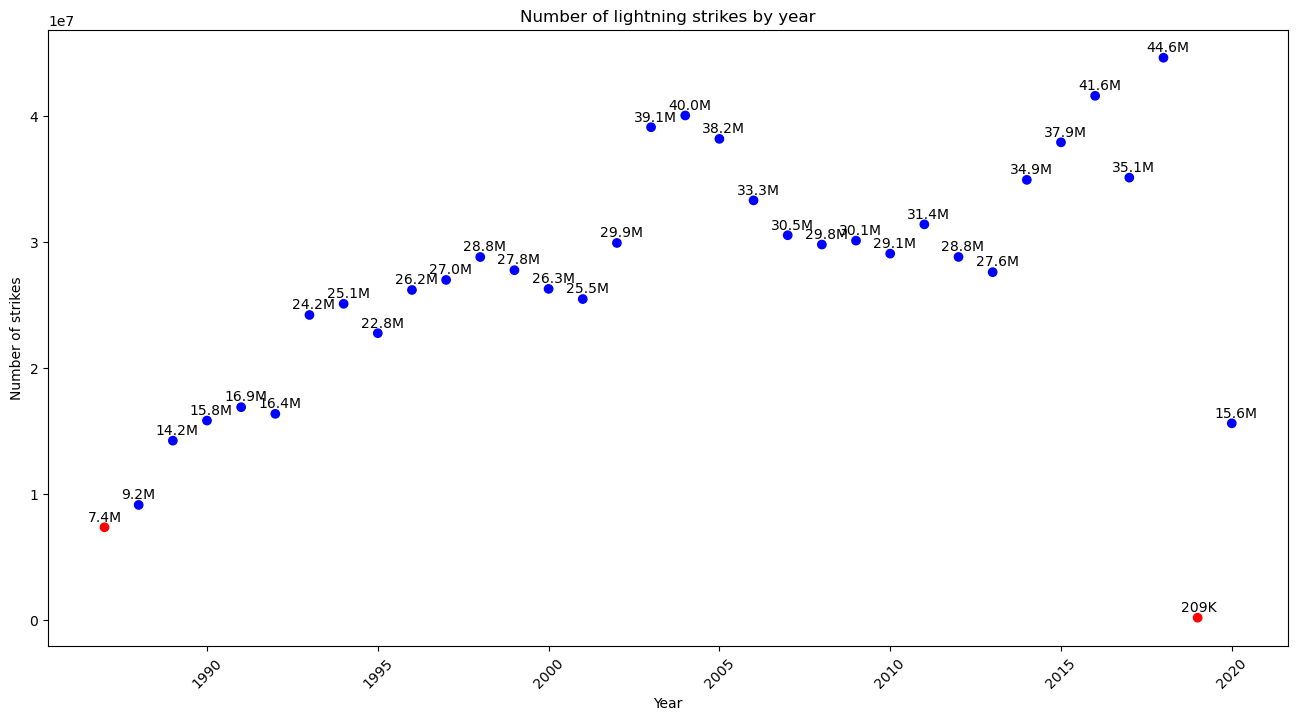

In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i]-0.5, y[i]+500000, s=readable_numbers(y[i]))

colors = np.where(df1['number_of_strikes'] < lower_limit, 'r', 'b')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['year'], df1['number_of_strikes'],c=colors)
ax.set_xlabel('Year')
ax.set_ylabel('Number of strikes')
ax.set_title('Number of lightning strikes by year')
addlabels(df1['year'], df1['number_of_strikes'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Investigating the outliers 2019 and 1987

Let's examine the two outlier years a bit more closely. In the section above, we used a preprocessed dataset that didn't include a lot of the information that we're accustomed to having in this data. In order to further investigate the outlier years, we'll need more information, so we're going to import data from these years specifically.

In [12]:
df2.head()

,date,number_of_strikes,center_point_geom
0,2019-12-01,1,POINT(-79.7 35.3)
1,2019-12-01,1,POINT(-84.7 39.3)
2,2019-12-01,1,POINT(-83.4 38.9)
3,2019-12-01,1,POINT(-71.5 35.2)
4,2019-12-01,1,POINT(-87.8 41.6)


In [13]:
df2['date'] = pd.to_datetime(df2['date'])

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54831 entries, 0 to 54830
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               54831 non-null  datetime64[ns]
 1   number_of_strikes  54831 non-null  int64         
 2   center_point_geom  54831 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ MB


In [15]:
## Create 2 new columns
df2['date'] = pd.to_datetime(df2['date'])
df2['month'] = df2['date'].dt.month
## cut the month names down to just the first three letters.
df2['month_txt'] = df2['date'].dt.month_name().str.slice(stop=3)

## Group by `month` and `month_txt`, sum it, and sort. Assign result to new df
df_2019_by_month = df2.groupby(['month','month_txt']).sum().sort_values('month', ascending=True)\
.head(12).reset_index()
df_2019_by_month

,month,month_txt,number_of_strikes
0,12,Dec,209166


In [16]:
## there is only december...

## checking the third one


In [17]:
## Create 2 new columns
df3['date'] = pd.to_datetime(df3['date'])
df3['month'] = df3['date'].dt.month
## cut the month names down to just the first three letters.
df3['month_txt'] = df3['date'].dt.month_name().str.slice(stop=3)

## Group by `month` and `month_txt`, sum it, and sort. Assign result to new df
df_1987_by_month = df3.groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()
df_1987_by_month

,month,month_txt,number_of_strikes
0,1,Jan,23044
1,2,Feb,61020
2,3,Mar,117877
3,4,Apr,157890
4,5,May,700910
5,6,Jun,1064166
6,7,Jul,2077619
7,8,Aug,2001899
8,9,Sep,869833
9,10,Oct,105627


In [18]:
df3

,date,number_of_strikes,center_point_geom,month,month_txt
0,1987-01-01,21,POINT(-80.7 26),1,Jan
1,1987-01-04,23,POINT(-83.2 28.3),1,Jan
2,1987-01-05,40,POINT(-78.9 31.3),1,Jan
3,1987-01-05,20,POINT(-79.2 31.4),1,Jan
4,1987-01-05,21,POINT(-80.1 31.4),1,Jan
...,...,...,...,...,...
1441229,1987-12-06,16,POINT(-95.3 32.3),12,Dec
1441230,1987-12-06,16,POINT(-96.2 34.5),12,Dec
1441231,1987-12-15,16,POINT(-84.8 28.1),12,Dec
1441232,1987-12-15,16,POINT(-84.6 28.1),12,Dec


1987 has data for every month of the year. Hence, this outlier should be treated differently than 2019, which is missing data. 

Finally, let's re-run the mean and median after removing the outliers. Our final takeaway from our lesson on outliers is that outliers significantly affect the dataset's mean, but do not significantly affect the median. 

To remove the outliers, we'll use a Boolean mask to create a new dataframe that contains only the rows in the original dataframe where the number of strikes >= the lower limit we calculated above.

In [19]:

# Create new df that removes outliers
df_without_outliers = df1[df1['number_of_strikes'] >= lower_limit]

# Recalculate mean and median values on data without outliers
print(f"Mean:    {readable_numbers(np.mean(df_without_outliers['number_of_strikes']))}")
print(f"Median:  {readable_numbers(np.median(df_without_outliers['number_of_strikes']))}")

Mean:    28.2M
Median:  28.8M


Both the mean and the median changed, but the mean much more so. It is clear that outlier values can affect the distributions of the data and the conclusions that can be drawn from them.
If you have successfully completed the material above, congratulations! You now understand discovering in Python and should be able to start using it on your own datasets. 